In [1]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# %matplotlib notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = [8, 6]

In [2]:
hp = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/house-prices.csv')
hp

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


Text(0.5, 1.0, 'Price vs Square Feet')

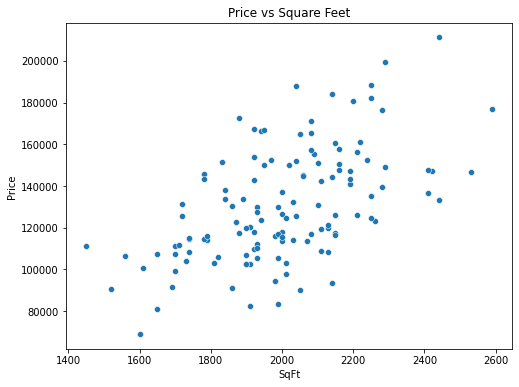

In [3]:
sns.scatterplot(x='SqFt', y='Price', data=hp).set_title('Price vs Square Feet')

## First step: Create train/test splits

- Train set is to fit the model (find the weights)
- Test set, after the model is trained, evaluate the model on data never seen before


In [4]:
# Features -> X
X = hp["SqFt"]
# Target labels -> y
y = hp["Price"]

X_train, X_test, y_train, y_test = train_test_split(
  X, y,
  test_size=0.2,
  random_state=0,
  shuffle=True
)


In [5]:
X.shape

(128,)

In [6]:
X_train.shape, X_test.shape

((102,), (26,))

In [7]:
y_train.shape, y_test.shape

((102,), (26,))

## Create a baseline (naive) model

In [8]:
class NaiveRegressor():
  """
  This model will compute the median from our
  training dataset and will use that value
  as the predicted value for any given input.

  h(x) = median(train_labels)
  """

  def __init__(self):
    self.w0 = 0
    self.w1 = 0

  def cost(self, X, y):
    diff = (self.predict(X) - y)**2
    diff_sum = sum(diff) / 2
    return diff_sum

  def fit(self, X, y):
    self.w0 = np.median(y)

  def predict(self, x):
    return self.w0


- **fit()** -> trains the model
- **predict()** -> uses the trained to get a prediction
- **transform()** -> uses the trained model to transform data, not used here but common to have it in scalers like MinMaxScaler()

In [9]:
# Create the regressor model
nv_regressor = NaiveRegressor()
# Calculate cost without training the model
nv_regressor.cost(X=X_train, y=y_train)

909851700000.0

In [10]:
# Predict returns 0 because we dind't train the model yet
# Weights are not set
nv_regressor.predict(100)

0

In [11]:
# Create and train the model
nv_regressor = NaiveRegressor()
nv_regressor.fit(X=X_train, y=y_train)
nv_regressor.cost(X=X_train, y=y_train)


38442637500.0

In [12]:
nv_regressor.predict(250)

126250.0

In [13]:
nv_regressor.predict(70)

126250.0

In [14]:
nv_regressor.predict(-100)

126250.0

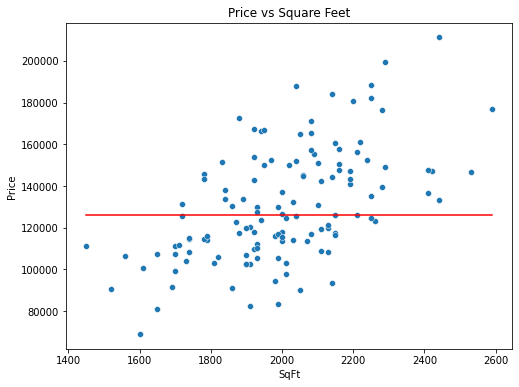

In [15]:
sns.scatterplot(x='SqFt', y='Price', data=hp).set_title('Price vs Square Feet')

x1 = hp["SqFt"].min()
x2 = hp["SqFt"].max()
y1 = nv_regressor.predict(x1)
y2 = nv_regressor.predict(x2)
sns.lineplot(x=[x1, x2,], y=[y1, y2,], color='r')

In [16]:
class RandLinearRegressor():
  """
  Linear regression model in which weights are
  chosen by random sampling.
  """

  def __init__(self, max_iter):
    self.w0 = 0
    self.w1 = 0
    self._max_iter = max_iter

  def cost(self, X, y):
    diff = (self.predict(X) - y)**2
    diff_sum = sum(diff) / 2
    return diff_sum

  def fit(self, X, y):
    for i in range(self._max_iter):
      initial_cost = self.cost(X, y)
      tmp_w0, tmp_w1 = self.w0, self.w1

      self.w0, self.w1 = np.random.randint(-10000, 10000, 2)
      cost_value = self.cost(X, y)
      if cost_value > initial_cost:
        self.w0, self.w1 = tmp_w0, tmp_w1

  def predict(self, x):
    y = self.w1 * x + self.w0
    return y


In [17]:
%%time

# Create and train the model
nv_regressor = RandLinearRegressor(max_iter=10000)

nv_regressor.fit(X=X_train, y=y_train)


CPU times: user 12.6 s, sys: 187 ms, total: 12.8 s
Wall time: 14.4 s


In [18]:
nv_regressor.w0, nv_regressor.w1

(-4562, 69)

In [19]:
nv_regressor.predict(2000)

133438

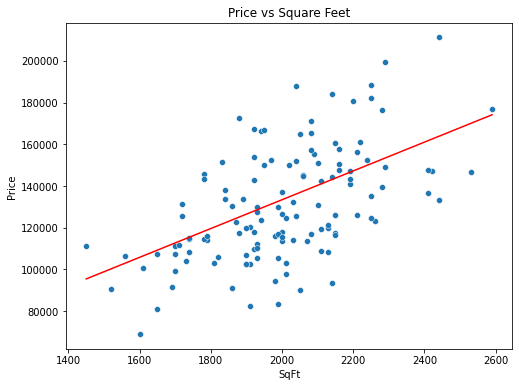

In [20]:
sns.scatterplot(x='SqFt', y='Price', data=hp).set_title('Price vs Square Feet')

x1 = hp["SqFt"].min()
x2 = hp["SqFt"].max()
y1 = nv_regressor.predict(x1)
y2 = nv_regressor.predict(x2)
sns.lineplot(x=[x1, x2,], y=[y1, y2,], color='r')

In [ ]:
train_cost = nv_regressor.cost(X=X_train, y=y_train)
train_cost


In [ ]:
test_cost = nv_regressor.cost(X=X_test, y=y_test)
test_cost

In [ ]:
train_cost - test_cost

## Train Linear Regression model on data

In [21]:
lr1 = SGDRegressor()


In [22]:
# This will fail bacause we didn't train the model yet
# Weights aren't set at this point
lr1.coef_, lr1.lr1.intercept_

AttributeError: ignored

In [28]:
# Train model and check weights again
lr1 = SGDRegressor(eta0=0.1, max_iter=1000, verbose=1, random_state=0)

lr1.fit(X_train.values.reshape(-1, 1), y_train)


-- Epoch 1
Norm: 48747180409793.96, NNZs: 1, Bias: 10123153090.745029, T: 102, Avg. loss: 5117184617126539296169511339687936.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 23769670016784.56, NNZs: 1, Bias: 13783338994.612255, T: 204, Avg. loss: 2029538360050839244866503860813824.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 15802720990520.26, NNZs: 1, Bias: 14161687408.768814, T: 306, Avg. loss: 1562706535870086538880911222505472.000000
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 39066712617658.24, NNZs: 1, Bias: 14891035215.987099, T: 408, Avg. loss: 1353887169270620441694996879376384.000000
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 33564036352924.40, NNZs: 1, Bias: -27346735371.313641, T: 510, Avg. loss: 1352086838923856716401548531335168.000000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 5295184223188.58, NNZs: 1, Bias: -26888638837.632362, T: 612, Avg. loss: 1212084162444376093486599016284160.000000
Total training time: 0.01 second

SGDRegressor(eta0=0.1, random_state=0, verbose=1)

4.716068909476778e+31

In [29]:
lr1.coef_

array([1.89832973e+13])

In [30]:
lr1.intercept_

array([3.60693584e+10])

### Plot data and trained model

Equation: y = 36069358353.59 + 18983297273835.85x1


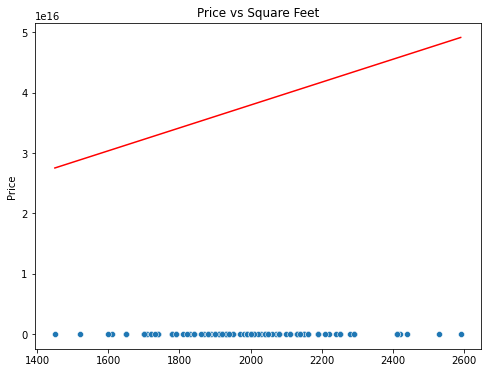

In [31]:
print(f"Equation: y = {lr1.intercept_[0]:.2f} + {lr1.coef_[0]:.2f}x1")

x1 = X_train.min()
y1 = (lr1.coef_ * x1 + lr1.intercept_)[0]
x2 = X_train.max()
y2 = (lr1.coef_ * x2 + lr1.intercept_)[0]

sns.scatterplot(x=X_train.values, y=y_train).set_title('Price vs Square Feet')
sns.lineplot(x=[x1, x2,], y=[y1, y2,], color='r')
plt.show()

In [ ]:
lr1.predict([[2400]])

## Let's use some Feature Engineering

We will scale our data first in order to help SGD algorithm to converge easier.

In [32]:
std_scaler = StandardScaler()
# Fit the scaler on train data ONLY!
std_scaler.fit(X_train.values.reshape(-1, 1))
X_train_scaled = std_scaler.transform(X_train.values.reshape(-1, 1))

# Now let's create our model and use the scaled features for training
lr1 = SGDRegressor(verbose=1, random_state=0)
lr1.fit(X_train_scaled, y_train)


-- Epoch 1
Norm: 4395.47, NNZs: 1, Bias: 45042.840718, T: 102, Avg. loss: 5850183314.284995
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 7060.95, NNZs: 1, Bias: 66794.321935, T: 204, Avg. loss: 3074479849.888780
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 8921.69, NNZs: 1, Bias: 81250.824567, T: 306, Avg. loss: 1883200568.279072
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 10260.68, NNZs: 1, Bias: 91664.501000, T: 408, Avg. loss: 1249072304.263856
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 11222.79, NNZs: 1, Bias: 99427.059190, T: 510, Avg. loss: 883408389.004863
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 11976.57, NNZs: 1, Bias: 105368.020858, T: 612, Avg. loss: 662620045.053049
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 12566.78, NNZs: 1, Bias: 110038.874546, T: 714, Avg. loss: 523945997.842264
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 13022.29, NNZs: 1, Bias: 113736.551303, T: 816, Avg. loss: 434961970.612724
Total training 

SGDRegressor(random_state=0, verbose=1)

Equation: y = 130803.01 + 15112.55x1


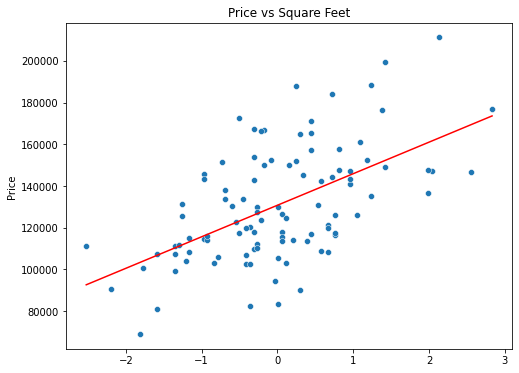

In [33]:
print(f"Equation: y = {lr1.intercept_[0]:.2f} + {lr1.coef_[0]:.2f}x1")

x1 = X_train_scaled.min()
y1 = (lr1.coef_ * x1 + lr1.intercept_)[0]
x2 = X_train_scaled.max()
y2 = (lr1.coef_ * x2 + lr1.intercept_)[0]

sns.scatterplot(x=X_train_scaled.flatten(), y=y_train).set_title('Price vs Square Feet')
sns.lineplot(x=[x1, x2,], y=[y1, y2,], color='r')
plt.show()

In [ ]:
# Make predictions on train dataset
y_train_pred = lr1.predict(X_train_scaled)


In [ ]:
# Make predictions on test dataset
X_test_scaled = std_scaler.transform(X_test.values.reshape(-1, 1))
y_test_pred = lr1.predict(X_test_scaled)


## Linear Regression with two features

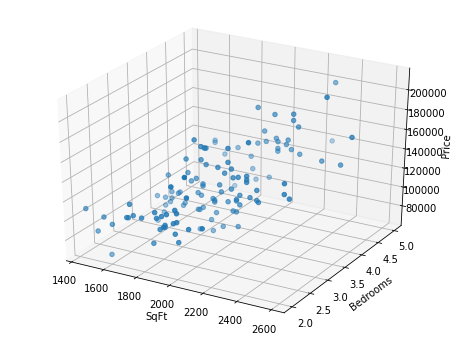

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = hp["SqFt"]
y = hp["Bedrooms"]
z = hp["Price"]

ax.set_xlabel("SqFt")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")

ax.scatter(x, y, z)

plt.show()

In [4]:
# Training code
lr2 = SGDRegressor(random_state=0)

X = hp[["SqFt", "Bedrooms"]].values
y = hp.Price.values

std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

lr2.fit(X_scaled, y)


SGDRegressor(random_state=0)

Equation: y = 130435.57 + 10414.80x1 + 9039.34x2


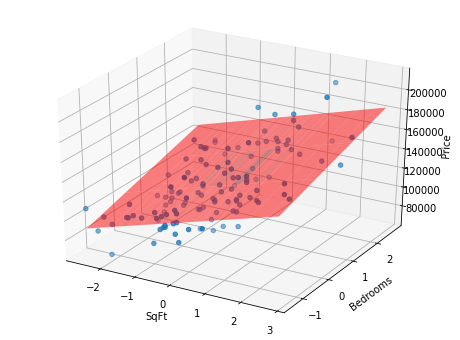

In [5]:
# Plot code
coefs = lr2.coef_
intercept = lr2.intercept_
num_samples = len(X)

x = X_scaled[:, 0]
y = X_scaled[:, 1]
z = hp.Price.values
xs = np.tile(np.sort(x), (num_samples, 1))
ys = np.tile(np.sort(y), (num_samples, 1)).T
zs = xs*coefs[0] + ys*coefs[1] + intercept
print(f"Equation: y = {intercept[0]:.2f} + {coefs[0]:.2f}x1 + {coefs[1]:.2f}x2")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("SqFt")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")

ax.scatter(x, y, z)
ax.plot_surface(xs,ys,zs, alpha=0.5, color='r')

plt.show()

In [6]:
y_pred = lr2.predict(X_scaled)


In [8]:
X[:10]

array([[1790,    2],
       [2030,    4],
       [1740,    3],
       [1980,    3],
       [2130,    3],
       [1780,    3],
       [1830,    3],
       [2160,    4],
       [2110,    4],
       [1730,    3]])

In [7]:
y_pred[:10]

array([107217.60112925, 144079.48006741, 117247.29285369, 129107.87790495,
       136520.74356199, 119224.0570289 , 121695.01224791, 150503.96363685,
       148033.00841783, 116753.10180989])

## Regression with Polynomial Features

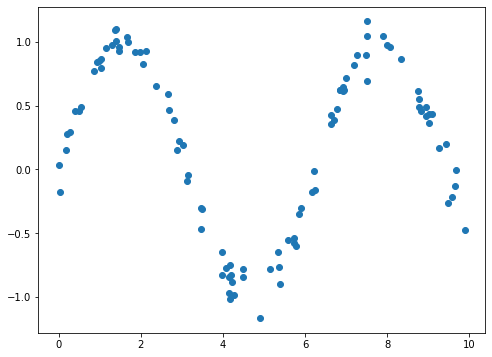

In [9]:
# Generate a random dataset
rng = np.random.RandomState(1)
num_samples = 100
x = 10 * rng.rand(num_samples)
x.sort()
y = np.sin(x) + 0.1 * rng.randn(num_samples)

plt.scatter(x, y)

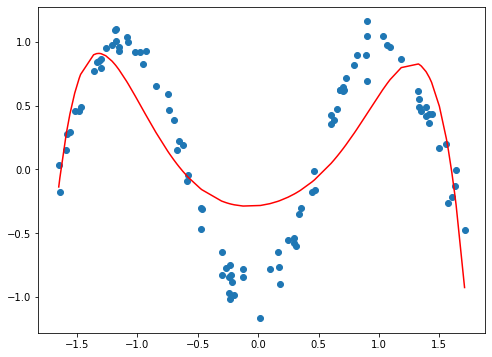

In [17]:
x_scaled = StandardScaler().fit_transform(x.reshape(-1, 1))

poly_model = make_pipeline(
  PolynomialFeatures(6),
  SGDRegressor(random_state=0)
)
poly_model.fit(x_scaled, y)
yfit = poly_model.predict(x_scaled)

plt.scatter(x_scaled, y)
plt.plot(x_scaled, yfit, color='red')